Classification without dropping NaN- XGBoost

In [ ]:
import os
import pandas as pd
import glob
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from xgboost import XGBClassifier


def import_classification_data(folder_path, label):
  all_data = []
  for file_name in glob.glob(os.path.join(folder_path, '*.csv')):
    data = pd.read_csv(file_name, header= None)

    data = data.iloc[:, 0:6]

    data[6] = label

    all_data.append(data)

  return pd.concat(all_data, ignore_index= True)


folder1_path = '/content/drive/MyDrive/Clean_only_CSV/0.6 K'
folder2_path = '/content/drive/MyDrive/Clean_only_CSV/8.5 K'

data_1 = import_classification_data(folder1_path, 0)
data_2 = import_classification_data(folder2_path, 1)

all_data = pd.concat([data_1, data_2], ignore_index= True)


X = all_data.iloc[:, 0:6]
y = all_data[6]

inner_folds = 5
outer_folds = 5
cv = StratifiedKFold(n_splits= outer_folds, shuffle= True, random_state= 42)
cv.get_n_splits(X, y)

parameters = {
    'max_depth': range(2, 10, 1),
    'n_estimators': range(10, 200, 20),
    'learning_rate': [0.1, 0.01, 0.05]
}

scorers = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

clf = XGBClassifier()
grid_search = GridSearchCV(clf, param_grid = parameters, scoring = scorers , cv = inner_folds, verbose = True, refit = 'accuracy')


acc_list = []
prec_list = []
rec_list = []
f1_list = []
roc_list = []

for i , (train_idx, test_idx) in enumerate(cv.split(X, y)):
  print(f'Fold: {i+1} : ')

  X_train = X.iloc[train_idx]
  X_test = X.iloc[test_idx]

  y_train = y.iloc[train_idx]
  y_test = y.iloc[test_idx]

  scaler = MinMaxScaler()

  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  grid_search.fit(X_train_scaled, y_train)

  pred = grid_search.predict(X_test_scaled)

  acc = accuracy_score(y_test, pred)
  acc_list.append(acc)
  prec = precision_score(y_test, pred)
  prec_list.append(prec)
  rec = recall_score(y_test, pred)
  rec_list.append(rec)
  f1 = f1_score(y_test, pred)
  f1_list.append(f1)
  roc_score = roc_auc_score(y_test, pred)
  roc_list.append(roc_score)

  print('\n')
  print(f'Best paramters for fold {i+1} are: {grid_search.best_params_}')
  print('\n')
  print(f'Accuracy for fold {i+1} is : {acc*100: 0.2f}')
  print(f'Precison for fold {i+1} is : {prec : 0.2f}')
  print(f'Recall for fold {i+1} is : {rec: 0.2f}')
  print(f'F1 Score for fold {i+1} is : {f1:0.2f}')
  print(f'ROC Score for fold {i+1} is : {roc_score :0.2f}')

print('\n')
print(f'Average accuracy is : {sum(acc_list)*100 / outer_folds: 0.2f}')
print(f'Average precision is : {sum(prec_list) / outer_folds: 0.2f}')
print(f'Average recall is : {sum(rec_list) / outer_folds: 0.2f}')
print(f'Average f1 score is : {sum(f1_list) / outer_folds: 0.2f}')
print(f'Average ROC score is : {sum(roc_list) / outer_folds: 0.2f}')




Fold: 1 : 
Fitting 5 folds for each of 240 candidates, totalling 1200 fits


Best paramters for fold 1 are: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 50}


Accuracy for fold 1 is :  70.59
Precison for fold 1 is :  0.70
Recall for fold 1 is :  0.77
F1 Score for fold 1 is : 0.73
ROC Score for fold 1 is : 0.70
Fold: 2 : 
Fitting 5 folds for each of 240 candidates, totalling 1200 fits


Best paramters for fold 2 are: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 10}


Accuracy for fold 2 is :  71.18
Precison for fold 2 is :  0.71
Recall for fold 2 is :  0.76
F1 Score for fold 2 is : 0.74
ROC Score for fold 2 is : 0.71
Fold: 3 : 
Fitting 5 folds for each of 240 candidates, totalling 1200 fits


Best paramters for fold 3 are: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 10}


Accuracy for fold 3 is :  71.04
Precison for fold 3 is :  0.71
Recall for fold 3 is :  0.75
F1 Score for fold 3 is : 0.73
ROC Score for fold 3 is : 0.71
Fold: 4 : 
Fitting 5 folds for 

Classification using catboost

In [ ]:
!pip install catboost
import os
import pandas as pd
import glob
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from catboost import CatBoostClassifier


def import_classification_data(folder_path, label):
  all_data = []
  for file_name in glob.glob(os.path.join(folder_path, '*.csv')):
    data = pd.read_csv(file_name, header= None)

    data = data.iloc[:, 0:6]

    data[6] = label

    all_data.append(data)

  return pd.concat(all_data, ignore_index= True)


folder1_path = '/content/drive/MyDrive/Clean_only_CSV/0.6 K'
folder2_path = '/content/drive/MyDrive/Clean_only_CSV/8.5 K'

data_1 = import_classification_data(folder1_path, 0)
data_2 = import_classification_data(folder2_path, 1)

all_data = pd.concat([data_1, data_2], ignore_index= True)


X = all_data.iloc[:,0:6]
y = all_data[6]

inner_folds = 5
outer_folds = 5
cv = StratifiedKFold(n_splits= outer_folds, shuffle= True, random_state= 123)
cv.get_n_splits(X, y)

parameters = {
    'max_depth': range(2, 10, 1),
    'n_estimators': range(10, 200, 20),
    'learning_rate': [0.1, 0.01, 0.05]
}

scorers = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

clf = CatBoostClassifier()
grid_search = GridSearchCV(clf, param_grid = parameters, scoring = scorers , cv = inner_folds, verbose = True, refit = 'accuracy')


acc_list = []
prec_list = []
rec_list = []
f1_list = []
roc_list = []

for i , (train_idx, test_idx) in enumerate(cv.split(X, y)):
  print(f'Fold: {i+1} : ')

  X_train = X.iloc[train_idx]
  X_test = X.iloc[test_idx]

  y_train = y.iloc[train_idx]
  y_test = y.iloc[test_idx]

  scaler = MinMaxScaler()

  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  grid_search.fit(X_train_scaled, y_train)

  pred = grid_search.predict(X_test_scaled)

  acc = accuracy_score(y_test, pred)
  acc_list.append(acc)
  prec = precision_score(y_test, pred)
  prec_list.append(prec)
  rec = recall_score(y_test, pred)
  rec_list.append(rec)
  f1 = f1_score(y_test, pred)
  f1_list.append(f1)
  roc_score = roc_auc_score(y_test, pred)
  roc_list.append(roc_score)

  print('\n')
  print(f'Best paramters for fold {i+1} are: {grid_search.best_params_}')
  print('\n')
  print(f'Accuracy for fold {i+1} is : {acc*100: 0.2f}')
  print(f'Precison for fold {i+1} is : {prec : 0.2f}')
  print(f'Recall for fold {i+1} is : {rec: 0.2f}')
  print(f'F1 Score for fold {i+1} is : {f1:0.2f}')
  print(f'ROC Score for fold {i+1} is : {roc_score :0.2f}')

print('\n')
print(f'Average accuracy is : {sum(acc_list)*100 / outer_folds: 0.2f}')
print(f'Average precision is : {sum(prec_list) / outer_folds: 0.2f}')
print(f'Average recall is : {sum(rec_list) / outer_folds: 0.2f}')
print(f'Average f1 score is : {sum(f1_list) / outer_folds: 0.2f}')
print(f'Average ROC score is : {sum(roc_list) / outer_folds: 0.2f}')




Streaming output truncated to the last 5000 lines.
17:	learn: 0.4757875	total: 256ms	remaining: 171ms
18:	learn: 0.4691897	total: 268ms	remaining: 155ms
19:	learn: 0.4625253	total: 281ms	remaining: 140ms
20:	learn: 0.4561608	total: 306ms	remaining: 131ms
21:	learn: 0.4496635	total: 320ms	remaining: 116ms
22:	learn: 0.4448154	total: 333ms	remaining: 101ms
23:	learn: 0.4401271	total: 346ms	remaining: 86.6ms
24:	learn: 0.4359084	total: 359ms	remaining: 71.8ms
25:	learn: 0.4303257	total: 372ms	remaining: 57.3ms
26:	learn: 0.4265759	total: 385ms	remaining: 42.8ms
27:	learn: 0.4222216	total: 399ms	remaining: 28.5ms
28:	learn: 0.4184370	total: 412ms	remaining: 14.2ms
29:	learn: 0.4141078	total: 430ms	remaining: 0us
0:	learn: 0.6746259	total: 12.1ms	remaining: 593ms
1:	learn: 0.6583409	total: 25ms	remaining: 601ms
2:	learn: 0.6428761	total: 37ms	remaining: 580ms
3:	learn: 0.6284769	total: 49.2ms	remaining: 566ms
4:	learn: 0.6155142	total: 61.3ms	remaining: 552ms
5:	learn: 0.6028001	total: 73.2

LightGBM Classifier

In [ ]:
import os
import pandas as pd
import glob
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from lightgbm import LGBMClassifier


def import_classification_data(folder_path, label):
  all_data = []
  for file_name in glob.glob(os.path.join(folder_path, '*.csv')):
    data = pd.read_csv(file_name, header= None)

    data = data.iloc[:, 0:6]

    data[6] = label

    all_data.append(data)

  return pd.concat(all_data, ignore_index= True)


folder1_path = '/content/drive/MyDrive/Clean_only_CSV/0.6 K'
folder2_path = '/content/drive/MyDrive/Clean_only_CSV/8.5 K'

data_1 = import_classification_data(folder1_path, 0)
data_2 = import_classification_data(folder2_path, 1)

all_data = pd.concat([data_1, data_2], ignore_index= True)


X = all_data.iloc[:,0:6]
y = all_data[6]

inner_folds = 5
outer_folds = 5
cv = StratifiedKFold(n_splits= outer_folds, shuffle= True, random_state= 123)
cv.get_n_splits(X, y)

parameters = {
    'max_depth': range(2, 15, 1),
    'n_estimators': range(10, 300, 20),
    'learning_rate': [0.1, 0.05, 0.01, 0.005, 0.001],
    'num_leaves': [2**i for i in range(2, 8)],
    'min_data_in_leaf': [20, 50, 100],
    'force_row_wise': [True, False],
    'force_col_wise': [True, False]
}

scorers = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

clf = LGBMClassifier()
grid_search = GridSearchCV(clf, param_grid = parameters, scoring = scorers , cv = inner_folds, verbose = True, refit = 'accuracy')


acc_list = []
prec_list = []
rec_list = []
f1_list = []
roc_list = []

for i , (train_idx, test_idx) in enumerate(cv.split(X, y)):
  print(f'Fold: {i+1} : ')

  X_train = X.iloc[train_idx]
  X_test = X.iloc[test_idx]

  y_train = y.iloc[train_idx]
  y_test = y.iloc[test_idx]

  scaler = MinMaxScaler()

  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  grid_search.fit(X_train_scaled, y_train)

  pred = grid_search.predict(X_test_scaled)

  acc = accuracy_score(y_test, pred)
  acc_list.append(acc)
  prec = precision_score(y_test, pred)
  prec_list.append(prec)
  rec = recall_score(y_test, pred)
  rec_list.append(rec)
  f1 = f1_score(y_test, pred)
  f1_list.append(f1)
  roc_score = roc_auc_score(y_test, pred)
  roc_list.append(roc_score)

  print('\n')
  print(f'Best paramters for fold {i+1} are: {grid_search.best_params_}')
  print('\n')
  print(f'Accuracy for fold {i+1} is : {acc*100: 0.2f}')
  print(f'Precison for fold {i+1} is : {prec : 0.2f}')
  print(f'Recall for fold {i+1} is : {rec: 0.2f}')
  print(f'F1 Score for fold {i+1} is : {f1:0.2f}')
  print(f'ROC Score for fold {i+1} is : {roc_score :0.2f}')

print('\n')
print(f'Average accuracy is : {sum(acc_list)*100 / outer_folds: 0.2f}')
print(f'Average precision is : {sum(prec_list) / outer_folds: 0.2f}')
print(f'Average recall is : {sum(rec_list) / outer_folds: 0.2f}')
print(f'Average f1 score is : {sum(f1_list) / outer_folds: 0.2f}')
print(f'Average ROC score is : {sum(roc_list) / outer_folds: 0.2f}')

Streaming output truncated to the last 5000 lines.
[LightGBM] [Info] Number of positive: 15247, number of negative: 13711
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Info] Number of positive: 15247, number of negative: 13711
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Info] Number of positive: 15247, number of negative: 13711
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[Lig

KeyboardInterrupt: ignored

Regression w/o dropping NaN- XGBoost

In [ ]:
import os
import pandas as pd
import glob
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor


def import_regression_data(folder_path):
  all_data = []
  for file_name in glob.glob(os.path.join(folder_path, '*.csv')):
    data = pd.read_csv(file_name, header= None)

    data = data.iloc[:, 0:6]

    all_data.append(data)

  return pd.concat(all_data, ignore_index= True)


folder_path = '/content/drive/MyDrive/Clean_only_CSV/Regression'


all_data = import_regression_data(folder_path)



X = pd.concat([all_data.iloc[:,0:2], all_data.iloc[:,4:6]], axis = 1)
y = all_data.iloc[:, 2:4]

inner_folds = 5
outer_folds = 5
cv = KFold(n_splits= outer_folds, shuffle= True, random_state= 123)

parameters = {
    'max_depth': range(2, 10, 1),
    'n_estimators': range(10, 200, 20),
    'learning_rate': [0.1, 0.01, 0.05]
}

scorers = {
    'mean_squared_error': 'neg_mean_squared_error',
    'mean_absolute_error': 'neg_mean_absolute_error',
}

reg = XGBRegressor()
grid_search = GridSearchCV(reg, param_grid = parameters, scoring = scorers , cv = inner_folds, verbose = True, refit = 'mean_squared_error')


mse_list = []
mae_list = []
mape_list = []

for i , (train_idx, test_idx) in enumerate(cv.split(X)):
  print(f'Fold: {i+1} : ')

  X_train = X.iloc[train_idx]
  X_test = X.iloc[test_idx]

  y_train = y.iloc[train_idx]
  y_test = y.iloc[test_idx]

  scaler = MinMaxScaler()

  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)


  grid_search.fit(X_train_scaled, y_train)

  pred = grid_search.predict(X_test_scaled)

  mse = mean_squared_error(y_test, pred)
  mse_list.append(mse)
  mae = mean_absolute_error(y_test, pred)
  mae_list.append(mae)
  mape = mean_absolute_percentage_error(y_test, pred)
  mape_list.append(mape)

  print('\n')
  print(f'Best paramters for fold {i+1} are: {grid_search.best_params_}')
  print('\n')
  print(f'MSE for fold {i+1} is : {mse}')
  print(f'MAE for fold {i+1} is : {mae}')
  print(f'MAPE for fold {i+1} is : {mape: 0.2f}')


print('\n')
print(f'Average MSE is : {sum(mse_list) / outer_folds}')
print(f'Average MAE is : {sum(mae_list) / outer_folds}')
print(f'Average MAPE is : {sum(mape_list) / outer_folds: 0.2f}')

Fold: 1 : 
Fitting 5 folds for each of 240 candidates, totalling 1200 fits


Best paramters for fold 1 are: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 10}


MSE for fold 1 is : 2.6678113571747355e-21
MAE for fold 1 is : 4.035849686530981e-12
MAPE for fold 1 is :  4.55
Fold: 2 : 
Fitting 5 folds for each of 240 candidates, totalling 1200 fits


Best paramters for fold 2 are: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 10}


MSE for fold 2 is : 1.6993554826561984e-21
MAE for fold 2 is : 3.777684046152659e-12
MAPE for fold 2 is :  4.14
Fold: 3 : 
Fitting 5 folds for each of 240 candidates, totalling 1200 fits


Best paramters for fold 3 are: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 170}


MSE for fold 3 is : 2.5182377300263114e-21
MAE for fold 3 is : 3.84938172923781e-12
MAPE for fold 3 is :  8.33
Fold: 4 : 
Fitting 5 folds for each of 240 candidates, totalling 1200 fits


Best paramters for fold 4 are: {'learning_rate': 0.01, 'max_depth': 2, 'n_est

Regression with catboost

In [ ]:
import os
import pandas as pd
import glob
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from catboost import CatBoostRegressor



def import_regression_data(folder_path):
  all_data = []
  for file_name in glob.glob(os.path.join(folder_path, '*.csv')):
    data = pd.read_csv(file_name, header= None)

    data = data.iloc[:, 0:6]

    all_data.append(data)

  return pd.concat(all_data, ignore_index= True)


folder_path = '/content/drive/MyDrive/Clean_only_CSV/Regression'


all_data = import_regression_data(folder_path)



X = pd.concat([all_data.iloc[:,0:2], all_data.iloc[:,4:6]], axis = 1)
y = all_data.iloc[:, 2:4]*1e12

inner_folds = 5
outer_folds = 5
cv = KFold(n_splits= outer_folds, shuffle= True, random_state= 123)

parameters = {
    'max_depth': range(2, 10, 1),
    'n_estimators': range(10, 200, 20),
    'learning_rate': [0.1, 0.01, 0.05]
}

scorers = {
    'mean_squared_error': 'neg_mean_squared_error',
    'mean_absolute_error': 'neg_mean_absolute_error',
}

reg = CatBoostRegressor()
grid_search = GridSearchCV(reg, param_grid = parameters, scoring = scorers , cv = inner_folds, verbose = True, refit = 'mean_squared_error')


mse_list = []
mae_list = []
mape_list = []

for i , (train_idx, test_idx) in enumerate(cv.split(X)):
  print(f'Fold: {i+1} : ')

  X_train = X.iloc[train_idx]
  X_test = X.iloc[test_idx]

  y_train = y.iloc[train_idx]
  y_test = y.iloc[test_idx]

  scaler = MinMaxScaler()

  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)



  grid_search.fit(X_train_scaled, y_train)

  pred = grid_search.predict(X_test_scaled)

  mse = mean_squared_error(y_test, pred)
  mse_list.append(mse)
  mae = mean_absolute_error(y_test, pred)
  mae_list.append(mae)
  mape = mean_absolute_percentage_error(y_test, pred)
  mape_list.append(mape)

  print('\n')
  print(f'Best paramters for fold {i+1} are: {grid_search.best_params_}')
  print('\n')
  print(f'MSE for fold {i+1} is : {mse}')
  print(f'MAE for fold {i+1} is : {mae}')
  print(f'MAPE for fold {i+1} is : {mape: 0.2f}')


print('\n')
print(f'Average MSE is : {sum(mse_list) / outer_folds}')
print(f'Average MAE is : {sum(mae_list) / outer_folds}')
print(f'Average MAPE is : {sum(mape_list) / outer_folds: 0.2f}')

Fold: 1 : 
Fitting 5 folds for each of 240 candidates, totalling 1200 fits


ValueError: ignored

Regression with LightGBM

In [ ]:
import os
import pandas as pd
import glob
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from lightgbm import LGBMRegressor



def import_regression_data(folder_path):
  all_data = []
  for file_name in glob.glob(os.path.join(folder_path, '*.csv')):
    data = pd.read_csv(file_name, header= None)

    data = data.iloc[:, 0:6]

    all_data.append(data)

  return pd.concat(all_data, ignore_index= True)


folder_path = '/content/drive/MyDrive/Clean_only_CSV/Regression'


all_data = import_regression_data(folder_path)



X = pd.concat([all_data.iloc[:,0:2], all_data.iloc[:,4:6]], axis = 1)
y = all_data.iloc[:, 2:4]*1e12

inner_folds = 5
outer_folds = 5
cv = KFold(n_splits= outer_folds, shuffle= True, random_state= 123)

parameters = {
    'max_depth': range(2, 10, 1),
    'n_estimators': range(10, 200, 20),
    'learning_rate': [0.1, 0.01, 0.05]
}

scorers = {
    'mean_squared_error': 'neg_mean_squared_error',
    'mean_absolute_error': 'neg_mean_absolute_error',
}

reg = LGBMRegressor()
grid_search = GridSearchCV(reg, param_grid = parameters, scoring = scorers , cv = inner_folds, verbose = True, refit = 'mean_squared_error')


mse_list = []
mae_list = []
mape_list = []

for i , (train_idx, test_idx) in enumerate(cv.split(X)):
  print(f'Fold: {i+1} : ')

  X_train = X.iloc[train_idx]
  X_test = X.iloc[test_idx]

  y_train = y.iloc[train_idx]
  y_test = y.iloc[test_idx]

  scaler = MinMaxScaler()

  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)



  grid_search.fit(X_train_scaled, y_train)

  pred = grid_search.predict(X_test_scaled)

  mse = mean_squared_error(y_test, pred)
  mse_list.append(mse)
  mae = mean_absolute_error(y_test, pred)
  mae_list.append(mae)
  mape = mean_absolute_percentage_error(y_test, pred)
  mape_list.append(mape)

  print('\n')
  print(f'Best paramters for fold {i+1} are: {grid_search.best_params_}')
  print('\n')
  print(f'MSE for fold {i+1} is : {mse}')
  print(f'MAE for fold {i+1} is : {mae}')
  print(f'MAPE for fold {i+1} is : {mape: 0.2f}')


print('\n')
print(f'Average MSE is : {sum(mse_list) / outer_folds}')
print(f'Average MAE is : {sum(mae_list) / outer_folds}')
print(f'Average MAPE is : {sum(mape_list) / outer_folds: 0.2f}')

AttributeError: ignored

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('/content/34_PN.csv', header = None)
#df.dropna(inplace= True, axis = 1)

X_test = pd.concat([df.iloc[:,0:2], df.iloc[:,4:6]], axis = 1)
y_test = df.iloc[:, 2:4]

X_test_scaled = scaler.transform(X_test)


trained_model = grid_search.best_estimator_
prediction = trained_model.predict(X_test_scaled)

pred_df = pd.DataFrame(prediction)

pred_df.to_csv('prediction_34.csv', index = False, header = None)

TFM Map Visualizing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path

# Load the csv file into a pandas dataframe
data_df = pd.read_csv("/content/34.csv", header=None, names=['x', 'y', 'tx', 'ty', 'xrub', 'yrub', 'xvorig', 'yvorig'])

# Extracting data from the dataframe
x = data_df['x'].dropna().values
y = data_df['y'].dropna().values
tx = data_df['tx'].dropna().values
ty = data_df['ty'].dropna().values
xrub = data_df['xrub'].dropna().values
yrub = data_df['yrub'].dropna().values
xvorig = data_df['xvorig'].dropna().values
yvorig = data_df['yvorig'].dropna().values

# Create a mask for points inside the boundary
boundary_path = Path(list(zip(xrub, yrub)))

# Filter data for quiver arrows to include only those points inside the boundary
quiver_mask = boundary_path.contains_points(np.column_stack((x, y)))
x_quiver = x[quiver_mask]
y_quiver = y[quiver_mask]
tx_quiver = tx[quiver_mask]
ty_quiver = ty[quiver_mask]

# Adjusting the scale factor for quiver arrows
scale_factor = 0.02

plt.figure(figsize=(12, 10))

# Create the heatmap for the magnitude of the tractions
magnitude = np.sqrt(tx**2 + ty**2)
plt.contourf(x.reshape(int(np.sqrt(len(x))), -1),
             y.reshape(int(np.sqrt(len(y))), -1),
             magnitude.reshape(int(np.sqrt(len(magnitude))), -1),
             cmap='jet', levels=100)
cbar = plt.colorbar(label='Magnitude (Pa)')
cbar.ax.tick_params(labelsize=10)

# Plotting the quiver (traction vectors) inside the boundary
plt.quiver(x_quiver, y_quiver, tx_quiver, ty_quiver, scale=scale_factor, color='w', width=0.005)

# Plotting the boundary and adjusting axis
plt.plot(xrub, yrub, 'w-', linewidth=2)
plt.xlim([min(xvorig), max(xvorig)])
plt.ylim([min(yvorig), max(yvorig)])
plt.xlabel('x (µm)', fontsize=12)
plt.ylabel('y (µm)', fontsize=12)
plt.title('Constrained FTTC: Tractions', fontsize=14)
plt.axis('equal')
plt.grid(False)

plt.tight_layout()
plt.show()


ValueError: ignored

<Figure size 1200x1000 with 0 Axes>

Plotting ground truth and prediction side by side

ValueError: ignored

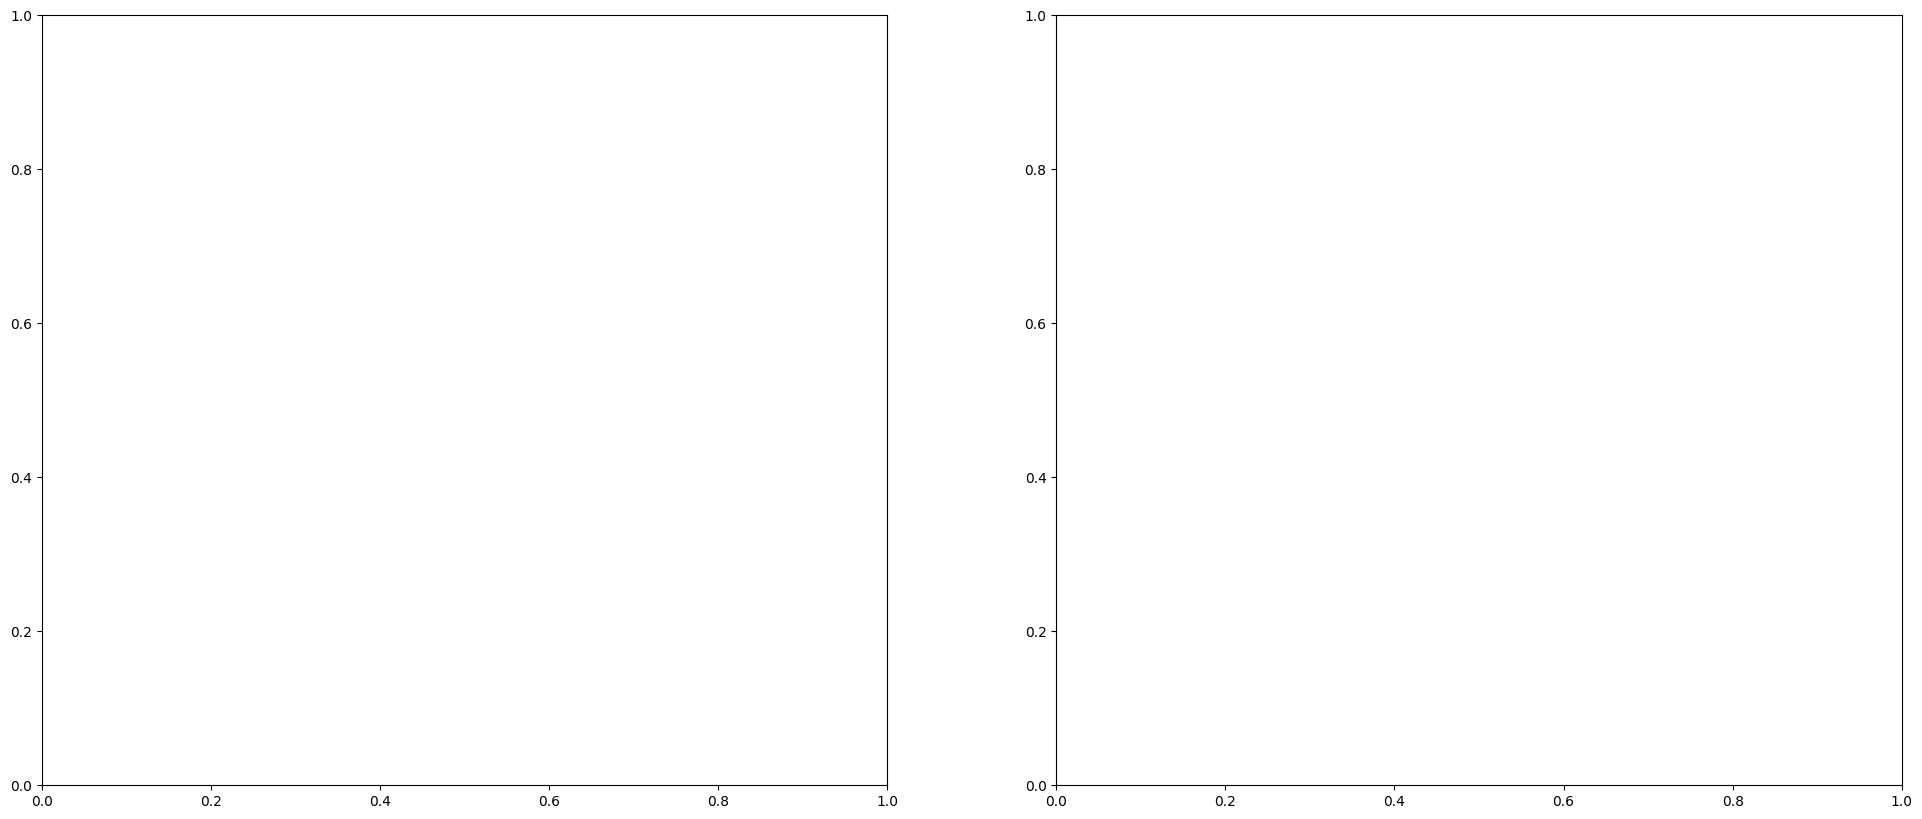

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path

def plot_data(data_df, ax):
    # Extracting data
    x = data_df['x'].dropna().values
    y = data_df['y'].dropna().values
    tx = data_df['tx'].dropna().values
    ty = data_df['ty'].dropna().values
    xrub = data_df['xrub'].dropna().values
    yrub = data_df['yrub'].dropna().values
    xvorig = data_df['xvorig'].dropna().values
    yvorig = data_df['yvorig'].dropna().values

    # Mask for points inside the boundary
    boundary_path = Path(list(zip(xrub, yrub)))
    quiver_mask = boundary_path.contains_points(np.column_stack((x, y)))
    x_quiver = x[quiver_mask]
    y_quiver = y[quiver_mask]
    tx_quiver = tx[quiver_mask]
    ty_quiver = ty[quiver_mask]

    # Adjusting scale factor for quiver arrows
    scale_factor = 1

    # Plotting
    magnitude = np.sqrt(tx**2 + ty**2)
    contour = ax.contourf(x.reshape(int(np.sqrt(len(x))), -1),
                          y.reshape(int(np.sqrt(len(y))), -1),
                          magnitude.reshape(int(np.sqrt(len(magnitude))), -1),
                          cmap='jet', levels=100)
    cbar = plt.colorbar(mappable=contour, ax=ax, orientation='vertical')  # Passing the mappable object to colorbar
    cbar.ax.tick_params(labelsize=10)
    ax.quiver(x_quiver, y_quiver, tx_quiver, ty_quiver, scale=scale_factor, color='w', width=0.005)
    ax.plot(xrub, yrub, 'w-', linewidth=2)
    ax.set_xlim([min(xvorig), max(xvorig)])
    ax.set_ylim([min(yvorig), max(yvorig)])
    ax.set_xlabel('x (µm)', fontsize=12)
    ax.set_ylabel('y (µm)', fontsize=12)
    ax.axis('equal')
    ax.grid(False)

# Load data
gt_df = pd.read_csv("/content/34.csv", header=None, names=['x', 'y', 'tx', 'ty', 'xrub', 'yrub', 'xvorig', 'yvorig'])
pred_df = pd.read_csv("/content/34_Pred.csv", header=None, names=['x', 'y', 'tx', 'ty', 'xrub', 'yrub', 'xvorig', 'yvorig'])

# Create figure and axes for side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(24, 10))

# Plot ground truth and prediction
plot_data(gt_df, axs[0])
axs[0].set_title('Ground Truth: Constrained FTTC Tractions', fontsize=14)
plot_data(pred_df, axs[1])
axs[1].set_title('Prediction: Constrained FTTC Tractions', fontsize=14)

plt.tight_layout()
plt.show()


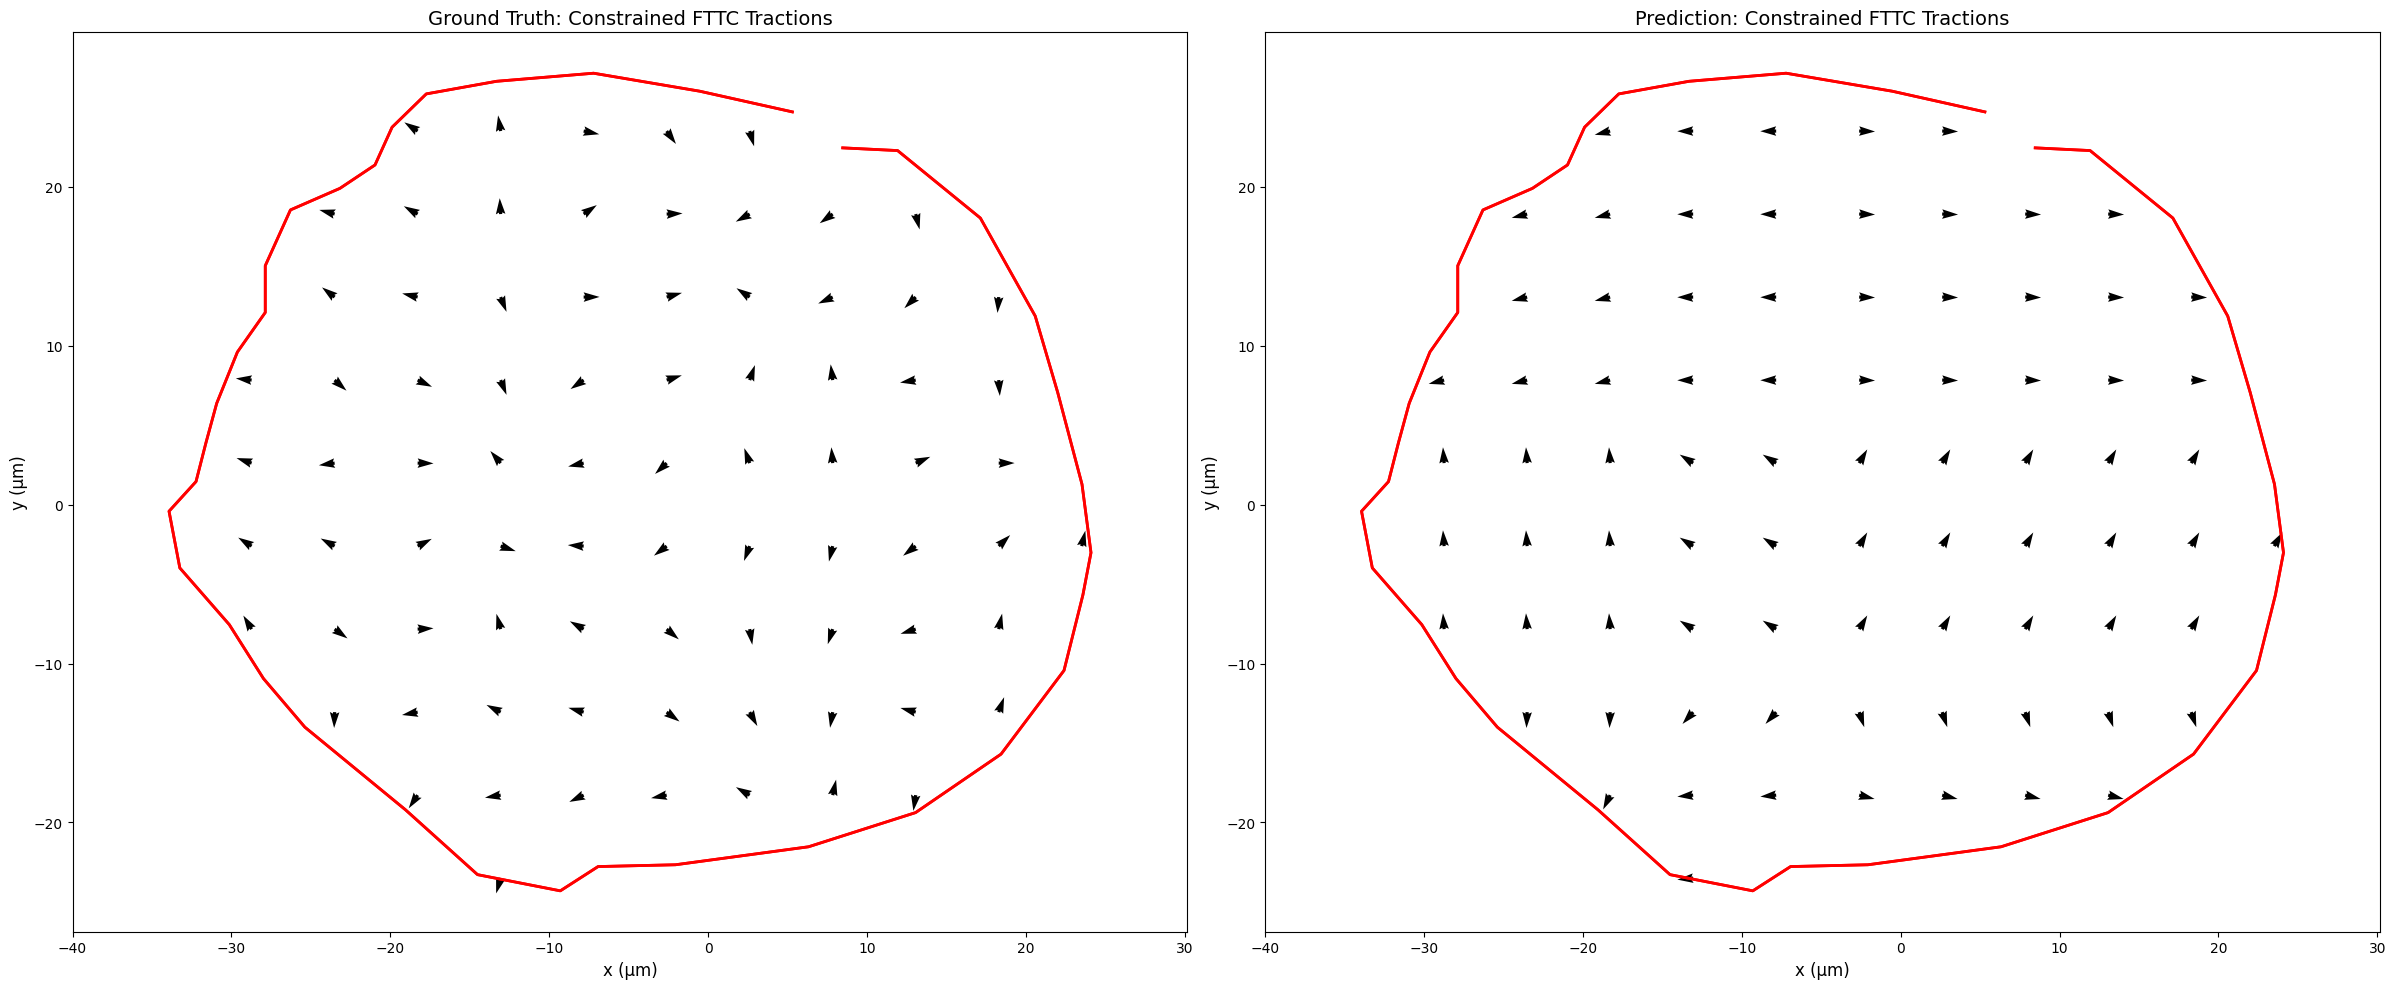

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path

def plot_data(data_df, ax):
    # Extracting data
    x = data_df['x'].dropna().values
    y = data_df['y'].dropna().values
    tx = data_df['tx'].dropna().values
    ty = data_df['ty'].dropna().values
    xrub = data_df['xrub'].dropna().values
    yrub = data_df['yrub'].dropna().values
    xvorig = data_df['xvorig'].dropna().values
    yvorig = data_df['yvorig'].dropna().values

    # Mask for points inside the boundary
    boundary_path = Path(list(zip(xrub, yrub)))
    quiver_mask = boundary_path.contains_points(np.column_stack((x, y)))
    x_quiver = x[quiver_mask]
    y_quiver = y[quiver_mask]
    tx_quiver = tx[quiver_mask]
    ty_quiver = ty[quiver_mask]

    # Adjusting scale factor for quiver arrows
    vector_length = np.sqrt(tx_quiver**2 + ty_quiver**2)
    tx_quiver_normalized = tx_quiver / vector_length
    ty_quiver_normalized = ty_quiver / vector_length

    # Adjusting scale factor for quiver arrows
    scale_factor = 1

    # Plotting
    quiver = ax.quiver(
        x_quiver, y_quiver, tx_quiver_normalized, ty_quiver_normalized,
        scale=scale_factor,
        scale_units='xy',
        color='k',
        width=0.005
    )
    ax.plot(xrub, yrub, 'r-', linewidth=2)  # changed color to black for visibility
    ax.plot(xrub, yrub, 'r-', linewidth=2)  # changed color to red for visibility
    ax.set_xlim([min(xvorig), max(xvorig)])
    ax.set_ylim([min(yvorig), max(yvorig)])
    ax.set_xlabel('x (µm)', fontsize=12)
    ax.set_ylabel('y (µm)', fontsize=12)
    ax.axis('equal')
    ax.grid(False)

# Load data
gt_df = pd.read_csv("/content/34_PN.csv", header=None, names=['x', 'y', 'tx', 'ty', 'xrub', 'yrub', 'xvorig', 'yvorig'])
pred_df = pd.read_csv("/content/34_PD.csv", header=None, names=['x', 'y', 'tx', 'ty', 'xrub', 'yrub', 'xvorig', 'yvorig'])

# Create figure and axes for side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(24, 10))

# Plot ground truth and prediction
plot_data(gt_df, axs[0])
axs[0].set_title('Ground Truth: Constrained FTTC Tractions', fontsize=14)
plot_data(pred_df, axs[1])
axs[1].set_title('Prediction: Constrained FTTC Tractions', fontsize=14)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv("/content/34.csv")

df.iloc[:,2:4] = df.iloc[:, 2:4]*1e12

df.to_csv('34_PN.csv', index = False, header = None)
